In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import os
from scipy.stats import norm, skew
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

target = 'Salinity'

# Load and merge data

In [2]:


try:
  df1 = pd.read_csv('/kaggle/input/sfb-band-and-params-data/sfb_band_data_20170622.csv')
  df2 = pd.read_csv('/kaggle/input/sfb-band-and-params-data/sfb_band_data_2021.csv')

  # Concatenate the dataframes vertically
  concatenated_df = pd.concat([df1, df2], ignore_index=True)

except FileNotFoundError:
  print("One or both of the CSV files were not found.")
except pd.errors.EmptyDataError:
  print("One or both of the CSV files are empty.")
except Exception as e:
  print(f"An error occurred: {e}")

In [3]:
concatenated_df

,Unnamed: 0,Date,Station,Lat,Long,MODIS_B01,MODIS_B02,MODIS_B03,MODIS_B04,MODIS_B05,MODIS_B06,MODIS_B07,SENTINEL_B01,SENTINEL_B02,SENTINEL_B03,SENTINEL_B04,SENTINEL_B05,SENTINEL_B06,SENTINEL_B07,SENTINEL_B08,SENTINEL_B8A,SENTINEL_B09,SENTINEL_B11,SENTINEL_B12
0,0,2001-02-06,411,38.096667,-122.058333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2001-02-06,407,38.071667,-122.093333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2001-02-06,405,38.048333,-122.123333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2001-02-06,20,37.820000,-122.393333,0.006601,0.006601,0.006601,0.006601,0.006601,0.006601,0.019046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2001-02-06,18,37.846667,-122.421667,0.000108,0.000108,0.000108,0.000108,0.004978,0.000108,0.012661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7537,1794,2021-12-06,21,37.788333,-122.358333,0.206911,0.226715,0.206911,0.206911,0.233966,0.528966,0.206911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7538,1795,2021-12-06,15,37.973333,-122.436667,0.002705,0.002705,0.002705,0.002705,0.002705,0.013311,0.002705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7539,1796,2021-12-06,17,37.878333,-122.421667,0.000000,0.024998,0.000000,0.000000,0.026621,0.011904,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7540,1797,2021-12-06,18,37.846667,-122.421667,0.008225,0.068069,0.008225,0.008225,0.059952,0.065580,0.008225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
params = pd.read_csv('/kaggle/input/sfb-band-and-params-data/sfb_params (1).csv')
params

,Unnamed: 0,Date,Station_Number,Depth,Salinity,Temperature,Calculated_Oxygen,Latitude_degree,Longitude_degree
0,17448,2001-02-06,2,1.0,4.64,9.82,9.8,38.063333,-121.851667
1,17468,2001-02-06,657,1.0,0.13,9.15,10.0,38.151667,-121.688333
2,17467,2001-02-06,649,1.0,2.11,9.64,9.9,38.060000,-121.800000
3,17466,2001-02-06,411,1.0,14.51,10.49,9.2,38.096667,-122.058333
4,17465,2001-02-06,407,1.0,17.65,10.47,9.0,38.071667,-122.093333
...,...,...,...,...,...,...,...,...,...
14704,3729,2021-12-06,22,1.0,30.47,13.92,NaN,37.765000,-122.358333
14705,3724,2021-12-06,16,1.0,31.05,13.44,NaN,37.916667,-122.446667
14706,3723,2021-12-06,15,1.0,27.99,13.63,NaN,37.973333,-122.436667
14707,3722,2021-12-06,14,1.0,28.50,13.66,NaN,38.006667,-122.405000


In [5]:
if 'Unnamed: 0' in concatenated_df.columns:
    concatenated_df = concatenated_df.drop('Unnamed: 0', axis=1)
if 'Unnamed: 0' in params.columns:
    params = params.drop('Unnamed: 0', axis=1)

In [6]:
# Rename 'Station Number' to 'Station' in params DataFrame
params = params.rename(columns={'Station_Number': 'Station'})

# Convert 'Station' column to integer in both datasets and concatenated_df
for df in [concatenated_df, params]:
    if 'Station' in df.columns:
        try:
            df['Station'] = df['Station'].astype(int)
        except ValueError:
            print(f"Could not convert 'Station' column to integer in DataFrame: {df}")
            # Handle the error appropriately, e.g., remove rows with invalid data
            # df = df[pd.to_numeric(df['Station'], errors='coerce').notnull()]
            # df['Station'] = df['Station'].astype(int)

# Convert 'Date' column to datetime in both datasets
for df in [concatenated_df, params]:
    if 'Date' in df.columns:
        try:
            df['Date'] = pd.to_datetime(df['Date'])
        except ValueError:
            print(f"Could not convert 'Date' column to datetime in DataFrame: {df}")
            # Handle the error as needed, for example, with a different date format
            # df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y') # or another format

In [7]:
# merge 2 data concatinate and params, base on station and date

data = pd.merge(concatenated_df, params, on=['Station', 'Date'], how='left')
data

,Date,Station,Lat,Long,MODIS_B01,MODIS_B02,MODIS_B03,MODIS_B04,MODIS_B05,MODIS_B06,MODIS_B07,SENTINEL_B01,SENTINEL_B02,SENTINEL_B03,SENTINEL_B04,SENTINEL_B05,SENTINEL_B06,SENTINEL_B07,SENTINEL_B08,SENTINEL_B8A,SENTINEL_B09,SENTINEL_B11,SENTINEL_B12,Depth,Salinity,Temperature,Calculated_Oxygen,Latitude_degree,Longitude_degree
0,2001-02-06,411,38.096667,-122.058333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.51,10.49,9.2,38.096667,-122.058333
1,2001-02-06,407,38.071667,-122.093333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.65,10.47,9.0,38.071667,-122.093333
2,2001-02-06,405,38.048333,-122.123333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.62,10.42,9.0,38.048333,-122.123333
3,2001-02-06,20,37.820000,-122.393333,0.006601,0.006601,0.006601,0.006601,0.006601,0.006601,0.019046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.26,11.02,8.4,37.820000,-122.393333
4,2001-02-06,18,37.846667,-122.421667,0.000108,0.000108,0.000108,0.000108,0.004978,0.000108,0.012661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.04,11.16,8.2,37.846667,-122.421667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11758,2021-12-06,21,37.788333,-122.358333,0.206911,0.226715,0.206911,0.206911,0.233966,0.528966,0.206911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.63,13.72,NaN,37.788333,-122.358333
11759,2021-12-06,15,37.973333,-122.436667,0.002705,0.002705,0.002705,0.002705,0.002705,0.013311,0.002705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.99,13.63,NaN,37.973333,-122.436667
11760,2021-12-06,17,37.878333,-122.421667,0.000000,0.024998,0.000000,0.000000,0.026621,0.011904,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.20,13.46,NaN,37.878333,-122.421667
11761,2021-12-06,18,37.846667,-122.421667,0.008225,0.068069,0.008225,0.008225,0.059952,0.065580,0.008225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.61,13.25,NaN,37.846667,-122.421667


In [8]:
data.columns

Index(['Date', 'Station', 'Lat', 'Long', 'MODIS_B01', 'MODIS_B02', 'MODIS_B03',
       'MODIS_B04', 'MODIS_B05', 'MODIS_B06', 'MODIS_B07', 'SENTINEL_B01',
       'SENTINEL_B02', 'SENTINEL_B03', 'SENTINEL_B04', 'SENTINEL_B05',
       'SENTINEL_B06', 'SENTINEL_B07', 'SENTINEL_B08', 'SENTINEL_B8A',
       'SENTINEL_B09', 'SENTINEL_B11', 'SENTINEL_B12', 'Depth', 'Salinity',
       'Temperature', 'Calculated_Oxygen', 'Latitude_degree',
       'Longitude_degree'],
      dtype='object')

In [9]:
data = data.drop(columns = ['SENTINEL_B01',
       'SENTINEL_B02', 'SENTINEL_B03', 'SENTINEL_B04', 'SENTINEL_B05',
       'SENTINEL_B06', 'SENTINEL_B07', 'SENTINEL_B08', 'SENTINEL_B8A',
       'SENTINEL_B09', 'SENTINEL_B11', 'SENTINEL_B12', 'Depth','Temperature', 'Calculated_Oxygen', 'Latitude_degree',
       'Longitude_degree','Lat', 'Long', 'Station'], axis = 1)

# Exploratory Data Analysis

In [10]:
data.describe()

,Date,MODIS_B01,MODIS_B02,MODIS_B03,MODIS_B04,MODIS_B05,MODIS_B06,MODIS_B07,Salinity
count,11763,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000,11763.000000
mean,2011-10-25 09:19:34.292272128,0.076753,0.091158,0.078488,0.076701,0.093567,0.156592,0.091513,25.527638
min,2001-02-06 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
25%,2006-10-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.006670,0.000000,24.190000
50%,2012-04-11 00:00:00,0.005195,0.007207,0.005809,0.005194,0.007251,0.033331,0.006562,27.700000
75%,2017-02-17 00:00:00,0.050539,0.061684,0.052056,0.050269,0.062444,0.125541,0.057792,30.140000
max,2021-12-06 00:00:00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,34.790000
std,NaN,0.241893,0.270662,0.244415,0.241880,0.273923,0.376157,0.276664,7.145300


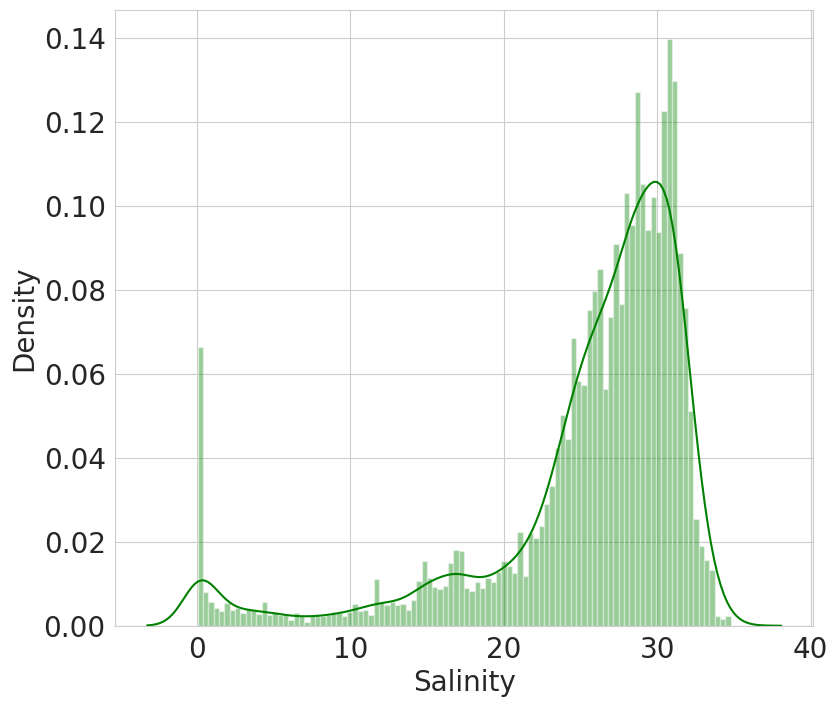

In [11]:
# Target Variable Distribution
plt.figure(figsize=(9, 8))
sns.distplot(data[target], color='g', bins=100, hist_kws={'alpha': 0.4})

# Adjust font sizes
plt.tick_params(axis='both', which='major', labelsize=20)  # Tick labels
plt.xlabel('Salinity', fontsize=20)  # X-axis label
plt.ylabel('Density', fontsize=20)  # Y-axis label

plt.savefig('us_distribution.png')

MODIS_B01 Analytics
isnull:
   Null: 0


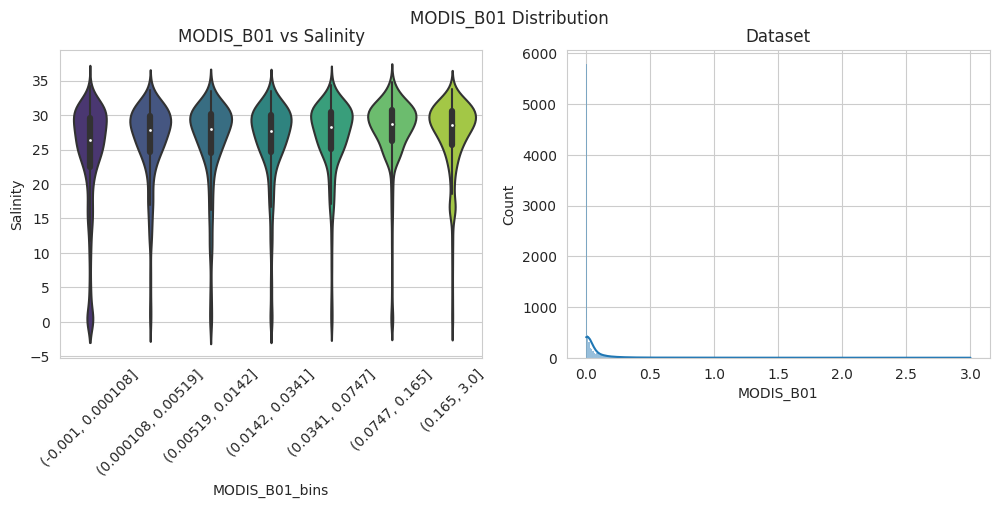

MODIS_B02 Analytics
isnull:
   Null: 0


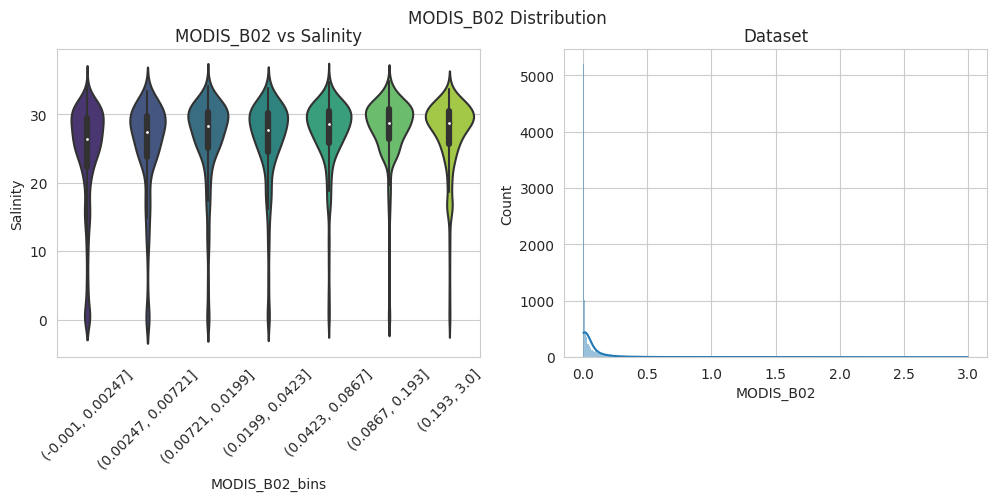

MODIS_B03 Analytics
isnull:
   Null: 0


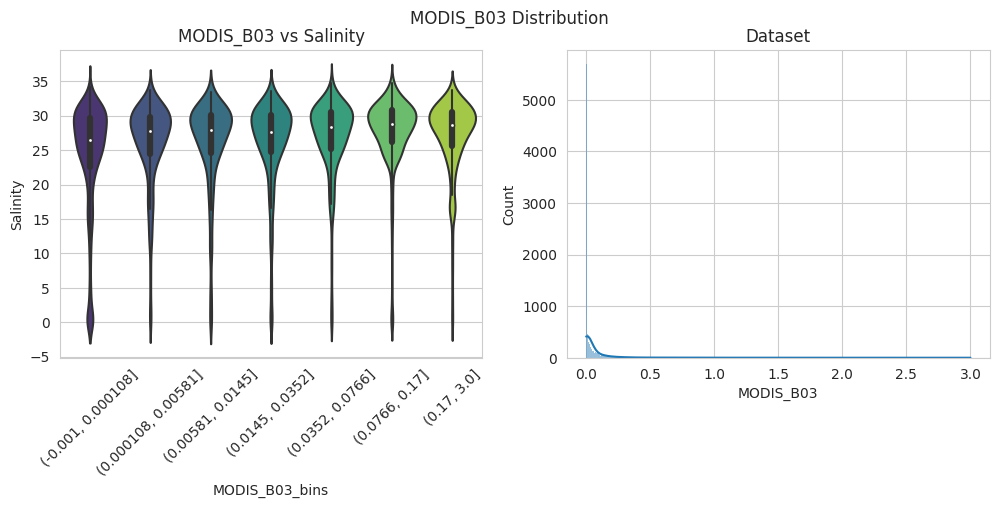

MODIS_B04 Analytics
isnull:
   Null: 0


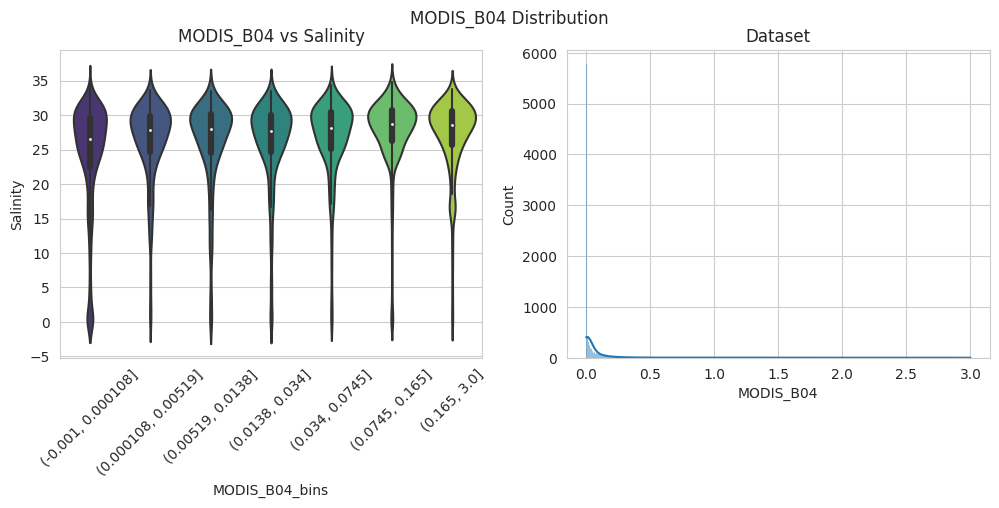

MODIS_B05 Analytics
isnull:
   Null: 0


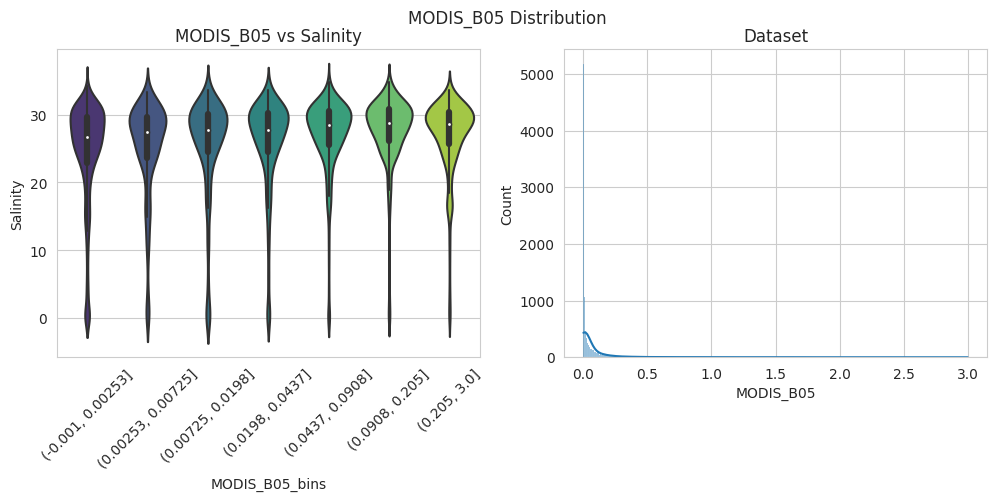

MODIS_B06 Analytics
isnull:
   Null: 0


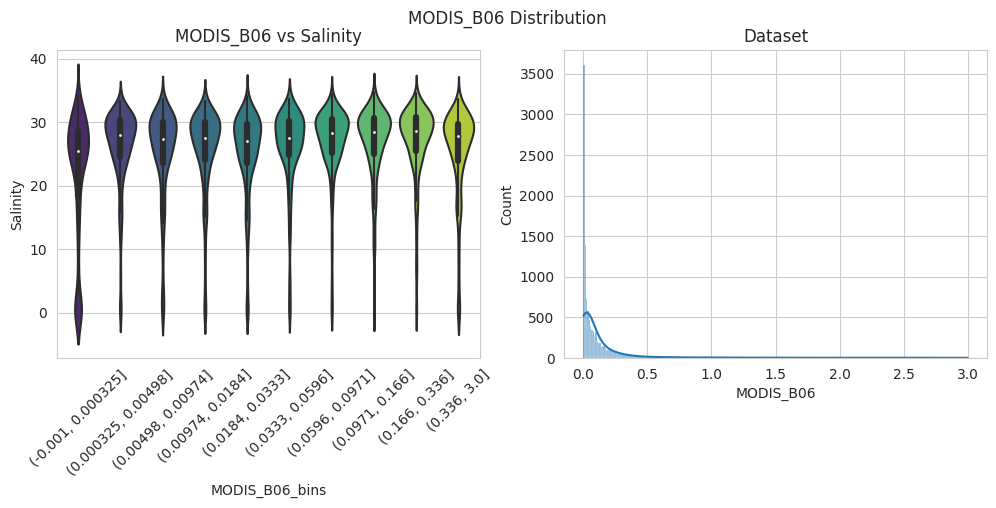

MODIS_B07 Analytics
isnull:
   Null: 0


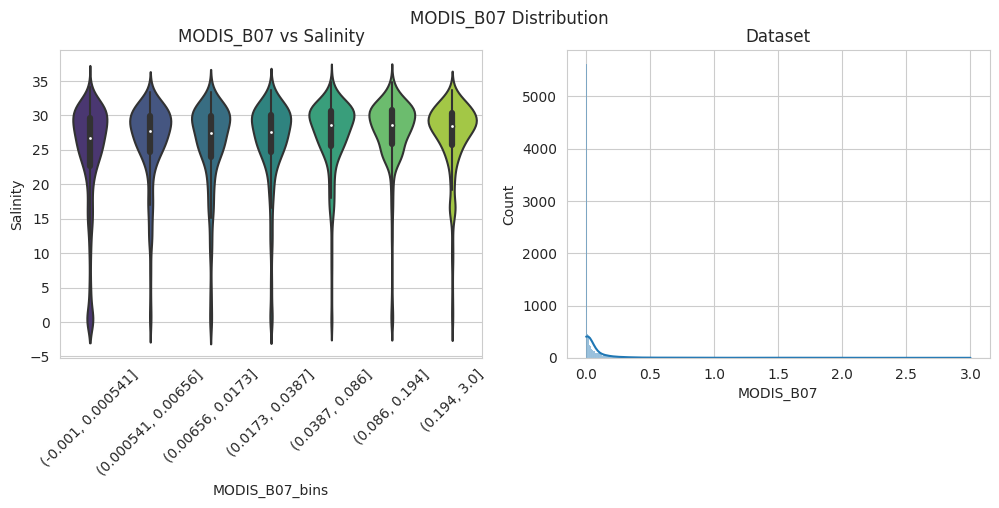

In [12]:
# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target]  # excluding target

# ----- Numeric Features EDA -----
num_bin = 10
for col in numeric_cols:
    print(f"{col} Analytics")
    print(f"isnull:\n   Null: {data[col].isnull().sum()}")
    data[f"{col}_bins"] = pd.qcut(data[col], q=num_bin, duplicates='drop')
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.violinplot(x=f"{col}_bins", y=target, data=data, palette='viridis', ax=ax[0])
    sns.histplot(data[col], kde=True, palette='viridis', ax=ax[1])
    fig.suptitle(f"{col} Distribution")
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].set_title(f"{col} vs {target}")
    ax[1].set_title("Dataset")
    plt.show()
    data.drop(columns=f"{col}_bins", inplace=True)

In [13]:
# Sum of negative values for each column
sum_negatives_per_column = data[numeric_cols][data[numeric_cols] <= 0].sum()
print("Sum of negative values per column:")
print(sum_negatives_per_column)

Sum of negative values per column:
MODIS_B01    0.0
MODIS_B02    0.0
MODIS_B03    0.0
MODIS_B04    0.0
MODIS_B05    0.0
MODIS_B06    0.0
MODIS_B07    0.0
dtype: float64


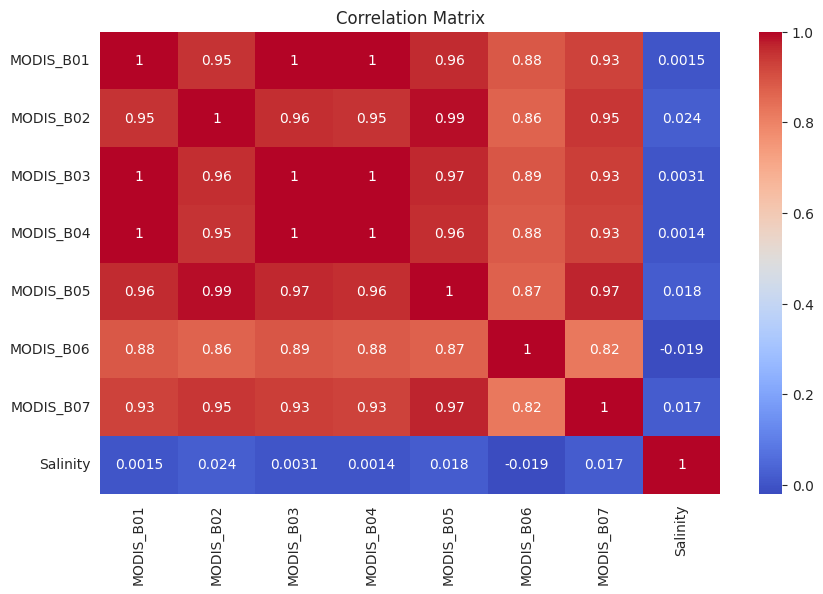

In [14]:
#Check the correlation matrix
plt.figure(figsize=(10,6))
corr = data[numeric_cols + [target]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Data preprocessing

In [15]:
# Convert 'Date' column to datetime objects if not already done
data['Date'] = pd.to_datetime(data['Date'])
#Feature Engineering Extract Date columns to day/ month/ year
data['Day'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

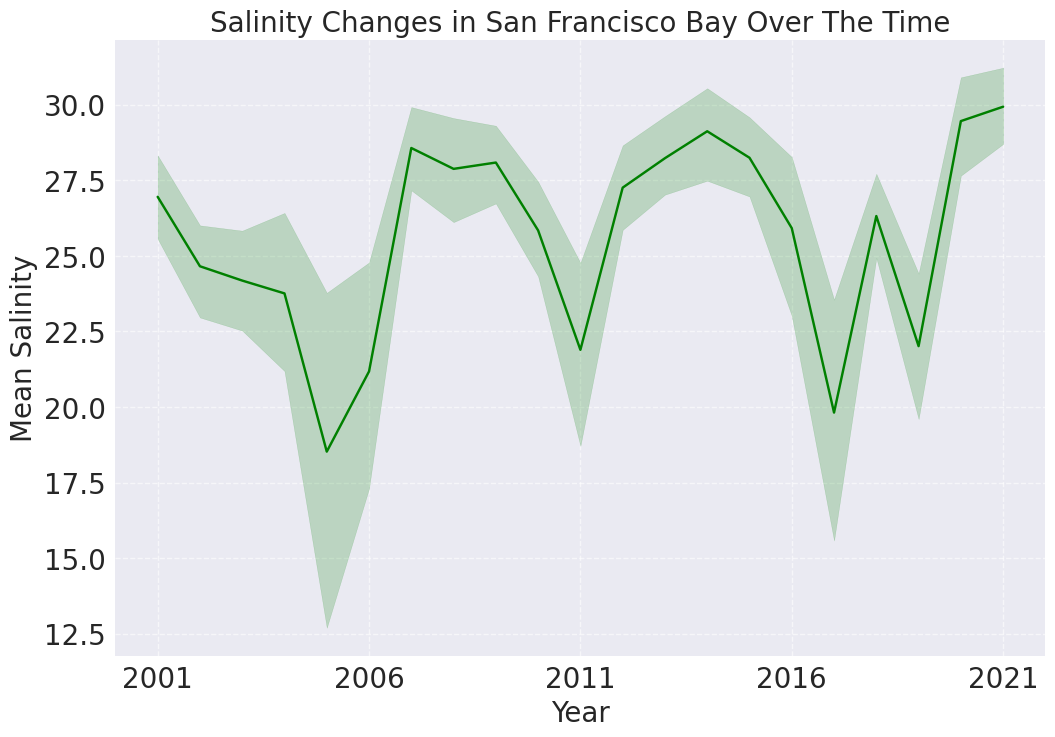

<Figure size 800x550 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Aggregating data to calculate mean salinity per day
df_daily_mean = data[['Month','Year','Salinity']].groupby(['Month','Year'], as_index=False)['Salinity'].mean()

# Setting up the style
plt.style.use("seaborn")

# Plotting the daily mean salinity
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_daily_mean, x='Year', y='Salinity', color='green')
plt.title('Salinity Changes in San Francisco Bay Over The Time', fontsize=20)
# Customizing the x-axis date format
# Manually setting x-axis ticks and labels
# Manually set the ticks on the x-axis to integers
plt.xticks(ticks=range(int(df_daily_mean['Year'].min()), int(df_daily_mean['Year'].max())+1,5))
plt.tick_params(axis='both', which='major', labelsize=20)  # Tick labels

plt.ylabel('Mean Salinity', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('salinity_change_sfb.png')

In [17]:
Q1 = data[target].quantile(0.25)
Q3 = data[target].quantile(0.75)
IQR = Q3 - Q1
#data = data[(data[target] >= Q1 - 1.5 * IQR) & (data[target] <= Q3 + 1.5 * IQR)]


In [18]:
data.nunique()

Date          420
MODIS_B01    2674
MODIS_B02    2950
MODIS_B03    2666
MODIS_B04    2632
MODIS_B05    2976
MODIS_B06    4014
MODIS_B07    2755
Salinity     1950
Day            21
Month          12
Year           21
dtype: int64

In [19]:
data.drop_duplicates(inplace=True)
data.shape

(7698, 12)


 mu = 24.87 and sigma = 8.00



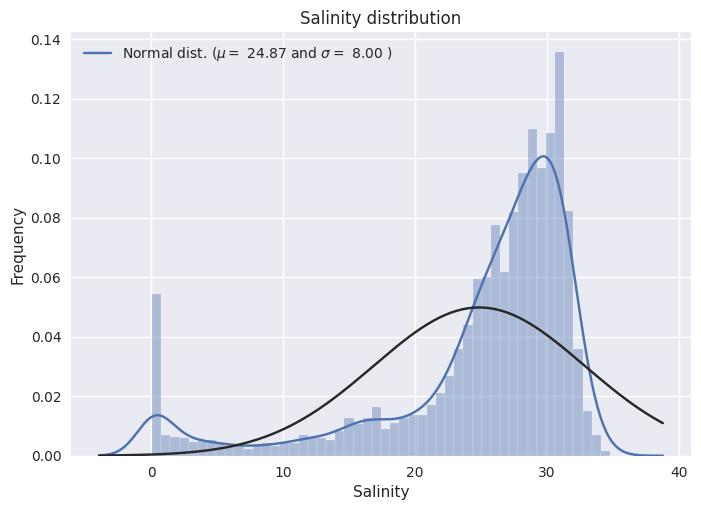

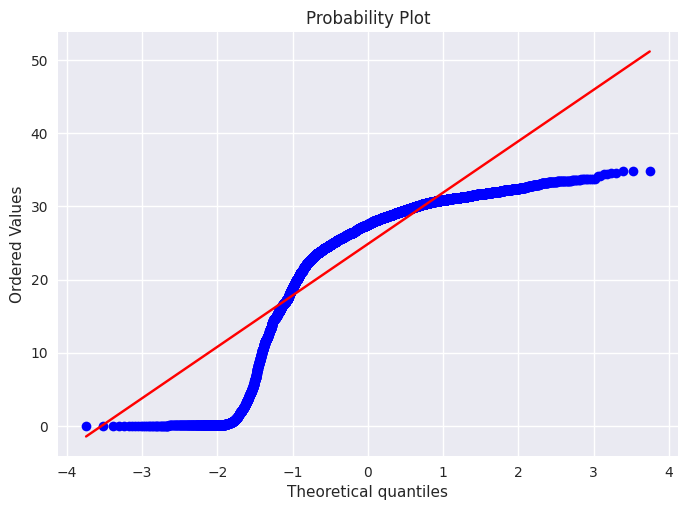

In [20]:
sns.distplot(data[target] , fit=norm);

(mu, sigma) = norm.fit(data[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Salinity distribution')

fig = plt.figure()
res = stats.probplot(data[target], plot=plt)
plt.show()

# Divide Testing & Training Set

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Divide into testing and training set
X = data[['Day','Month', 'Year', 'MODIS_B01', 'MODIS_B02', 'MODIS_B03', 'MODIS_B04', 'MODIS_B05', 'MODIS_B06', 'MODIS_B07']] 
y = data[target]  

# 1. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Combine features and target for saving to CSV
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to CSV files
train_data.to_csv("training_set.csv", index=False)
test_data.to_csv("testing_set.csv", index=False)